### Data Mining course
**Student:**    Danis Alukaev <br>
**Email:**      d.alukaev@innopolis.university <br>
**Group:**      B19-DS-01

## Table of contents
- Prerequisites
- Data understanding
  - Collect initial data
  - Describe data
  - Explore data
    - Distribution countries
    - Seasonality patterns
    - Sequences
  - Verify data quality
  - Notes

## Prerequsites

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib_inline
from pandas_profiling import ProfileReport
import random
import pprint
from scipy import stats
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip    

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
Note: you may need to restart the kernel to use updated packages.


In [3]:
random.seed(42)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Data understanding
------------
The data understanding phase starts with an initial data collection and proceeds withactivities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data or to detect interesting subsets to form hypothesesfor hidden information.

## Collect initial data
----------


### Task

Acquire within the project the data (or access to the data) listed in the
project resources. This initial collection includes data loading if necessary
for data understanding. For example, if you apply a specific tool for data
understanding, it makes perfect sense to load your data into this tool.
This effort possibly leads to initial data preparation steps.

Note: if you acquire multiple data sources, integration is an additional
issue, either here or in the later data preparation phase.

### Output

List the dataset (or datasets) acquired, together with their locations
within the project, the methods used to acquire them and any problems
encountered. Record problems encountered and any solutions achieved
to aid with future replication of this project or with the execution of
similar future projects.

-----------------

In [4]:
ds_dir = './data/'
ds = 'Online Retail.xlsx'
sheet = 'Online Retail'
path = os.path.join(ds_dir, ds)

data = pd.read_excel(path, sheet_name=sheet)

In [5]:
data = pd.read_excel(path, sheet_name=sheet)

## Describe data
----------

### Task

Examine the “gross” or “surface” properties of the acquired data and
report on the results.

### Output

Describe the data which has been acquired, including: the format of
the data, the quantity of data, for example number of records and fields
in each table, the identities of the fields and any other surface features
of the data which have been discovered. Does the data acquired satisfy
the relevant requirements?

-------------

In [6]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Explore data
----------

### Task

This task tackles the data mining questions, which can be addressed
using querying, visualization and reporting. These include: distribution
of key attributes, for example the target attribute of a prediction task;
relations between pairs or small numbers of attributes; results of
simple aggregations; properties of significant sub-populations; simple
statistical analyses. These analyses may address directly the data mining goals; they may also contribute to or refine the data description
and quality reports and feed into the transformation and other data
preparation needed for further analysis.

### Output

Describe results of this task including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate,
include graphs and plots, which indicate data characteristics or lead
to interesting data subsets for further examination.

-------------------

In [8]:
df = data.copy()

In [9]:
df['Total'] = df.Quantity * df.UnitPrice
df['Year'] = df.InvoiceDate.dt.year
df['Month'] = df.InvoiceDate.dt.month
df['Day'] = df.InvoiceDate.dt.day
df['Weekday'] = df.InvoiceDate.dt.day_name()
df['Hour'] = df.InvoiceDate.dt.hour

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Year,Month,Day,Weekday,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,8


#### Distribution over countries

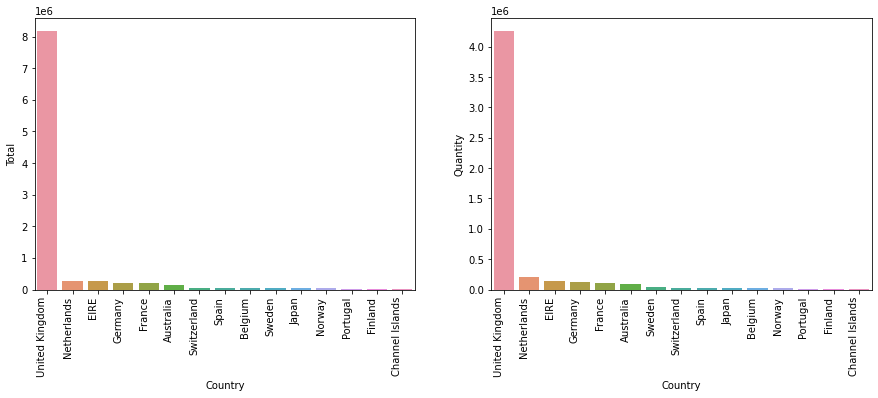

In [11]:
quantities = pd.DataFrame(df.groupby('Country')['Quantity'].sum()).sort_values(by='Quantity', ascending=False).reset_index()
revenue = pd.DataFrame(df.groupby('Country')['Total'].sum()).sort_values(by='Total', ascending=False).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1 = sns.barplot(x='Country', y='Total', data=revenue.head(15), estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2 = sns.barplot(x='Country', y='Quantity', data=quantities.head(15), estimator=max, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.show()

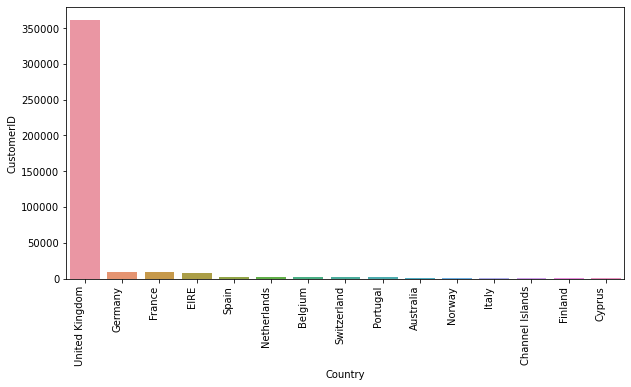

In [12]:
customers = pd.DataFrame(df.groupby('Country')['CustomerID'].count()).sort_values(by='CustomerID', ascending=False).reset_index()

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)
ax1 = sns.barplot(x='Country', y='CustomerID', data=customers.head(15), estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.show()

#### Seasonality patterns

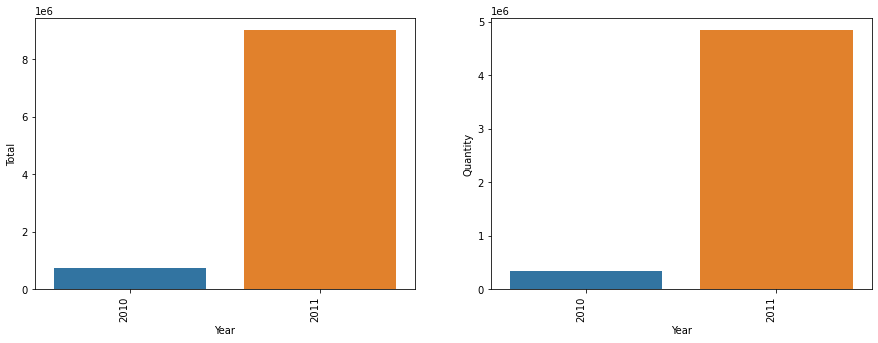

In [13]:
revenue_years = pd.DataFrame(df.groupby('Year')['Total'].sum()).sort_values(by='Total', ascending=False).reset_index()
quantity_years = pd.DataFrame(df.groupby('Year')['Quantity'].sum()).sort_values(by='Quantity', ascending=False).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1 = sns.barplot(x='Year', y='Total', data=revenue_years, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2 = sns.barplot(x='Year', y='Quantity', data=quantity_years, estimator=max, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.show()


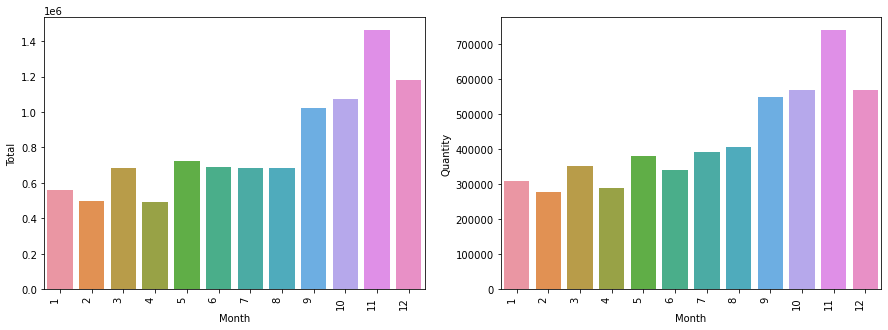

In [14]:
revenue_months = pd.DataFrame(df.groupby('Month')['Total'].sum()).sort_values(by='Total', ascending=False).reset_index()
quantity_months = pd.DataFrame(df.groupby('Month')['Quantity'].sum()).sort_values(by='Quantity', ascending=False).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1 = sns.barplot(x='Month', y='Total', data=revenue_months, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2 = sns.barplot(x='Month', y='Quantity', data=quantity_months, estimator=max, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.show()


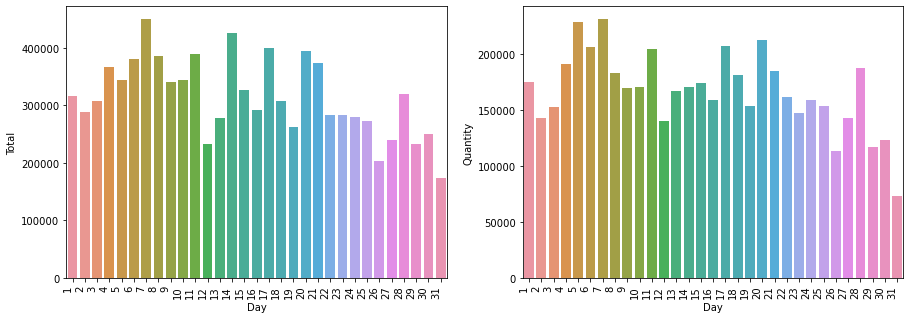

In [15]:
revenue_days = pd.DataFrame(df.groupby('Day')['Total'].sum()).sort_values(by='Total', ascending=False).reset_index()
quantity_days = pd.DataFrame(df.groupby('Day')['Quantity'].sum()).sort_values(by='Quantity', ascending=False).reset_index()


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1 = sns.barplot(x='Day', y='Total', data=revenue_days, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2 = sns.barplot(x='Day', y='Quantity', data=quantity_days, estimator=max, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.show()

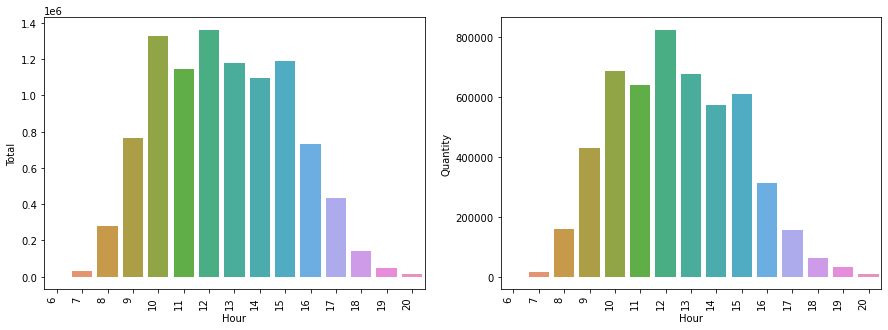

In [16]:
revenue_hours = pd.DataFrame(df.groupby('Hour')['Total'].sum()).sort_values(by='Total', ascending=False).reset_index()
quantity_hours = pd.DataFrame(df.groupby('Hour')['Quantity'].sum()).sort_values(by='Quantity', ascending=False).reset_index()


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1 = sns.barplot(x='Hour', y='Total', data=revenue_hours, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2 = sns.barplot(x='Hour', y='Quantity', data=quantity_hours, estimator=max, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.show()

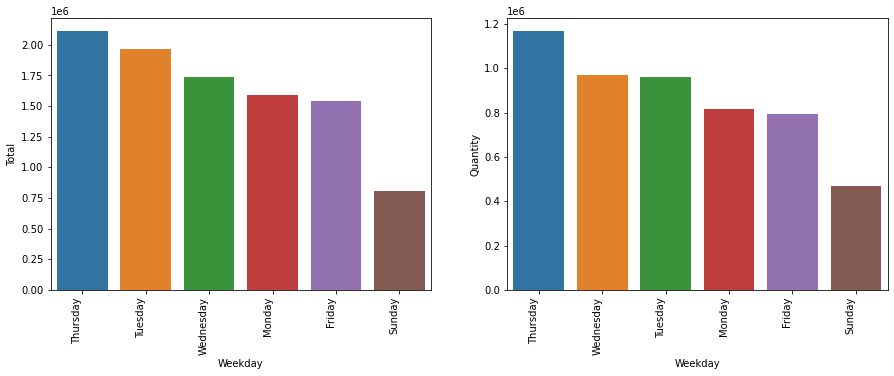

In [17]:
revenue_weekday = pd.DataFrame(df.groupby('Weekday')['Total'].sum()).sort_values(by='Total', ascending=False).reset_index()
quantity_weekday = pd.DataFrame(df.groupby('Weekday')['Quantity'].sum()).sort_values(by='Quantity', ascending=False).reset_index()


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax1 = sns.barplot(x='Weekday', y='Total', data=revenue_weekday, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
ax2 = sns.barplot(x='Weekday', y='Quantity', data=quantity_weekday, estimator=max, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.show()

#### Sequences

In [18]:
df[['Quantity', 'UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [19]:
profile = ProfileReport(df, minimal=True)
profile.to_file(path + "data_understanding_report.html")
profile

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 614.28it/s]


## Verify data quality
----------

### Task

Examine the quality of the data, addressing questions such as: is the
data complete (does it cover all the cases required)? Is it correct or
does it contain errors and if there are errors how common are they?
Are there missing values in the data? If so how are they represented,
where do they occur and how common are they?

### Output

List the results of the data quality verification; if quality problems
exist, list possible solutions. Solutions to data quality problems
generally depend heavily on both data and business knowledge.

-----------------

In [27]:
print(f"No. of cancelled orders: {len(df[df['InvoiceNo'].astype(str).str.contains('C')])}")
print(f"No. negative quantities: {len(df[df.Quantity <= 0])}")
print(f"No. of duplicated entries: {len(df[df.duplicated(keep=False)])}")
print(f"No. of NaN customer ids: {len(df[df.CustomerID.isnull()])}")
print(f"No. of NaN descriptions: {len(df[df.Description.isnull()])}")
print(f"No. of outliers: {len(df[(np.abs(stats.zscore(df.select_dtypes(include=int))) > 3).any(axis=1)])}")

No. of cancelled orders: 9288
No. negative quantities: 10624
No. of duplicated entries: 10147
No. of NaN customer ids: 135080
No. of NaN descriptions: 1454
No. of outliers: 42807


## Notes/questions
-------------


### Collect initial data

The data is mount to the local directory "data", and the only dataset we have has a name of "Online Retail.xlsx". The data distributed in the sheed of excel format. In order to import the data there is used `pd.read_excel` method.  

#### Troubleshooting
The data we have is in the excel format, so when you first invoke `pd.read_excel` there might be the following error:
> ImportError: Missing optional dependency 'openpyxl'. Use pip or conda to install openpyxl.

The problem is in the missing package, try `pip3 install openpyxl`.


### Describe data

The data contains 541909 entries along with 8 features: `StockCode`, `Description`, `Quantity`, `InvoiceDate`, `UnitPrice`, `CustomerId`, `Country`. 

The format of the data is as follows:
```
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
```

The data satisfies the relevant requirements. However, it needs prcessing on the further steps: the object types should be encoded, `customerID` casted to integer. 

### Explore data
The numeric attribute `Quantity` has distribution 9.55 ± 218.08, and the `UnitPrice` is 4.05 ± 96.76. 
The `Quantity` can be negative, I suppose it represents the refund.

The total number of transactions is 25900, items - 4224, No.customers - 4373. The business is relatively small, it is definitely retail and it is functioning in 38 countries.

### Verify data quality

#### Troubleshooting
In the `InvoiceNo` there are string entries. The solution will be sort integers and strings independently, and then merge.
